In [3]:
%matplotlib inline

# Matplotlib

In [1]:
import numpy as np
import matplotlib.pyplot as plt

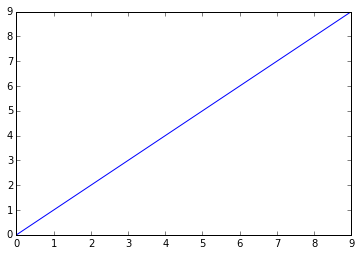

In [4]:
plt.plot(np.arange(10))

In [5]:
fig = plt.figure()

In [6]:
ax1 = fig.add_subplot(2,2,1)

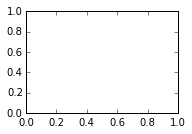

In [7]:
fig

In [8]:
ax2= fig.add_subplot(2,2,2)

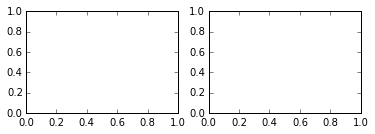

In [9]:
fig

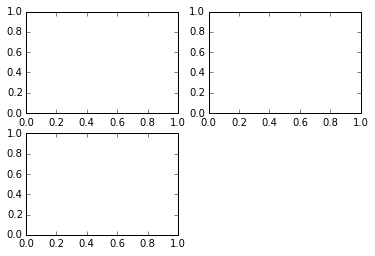

In [11]:
ax3 = fig.add_subplot(2,2,3)
fig

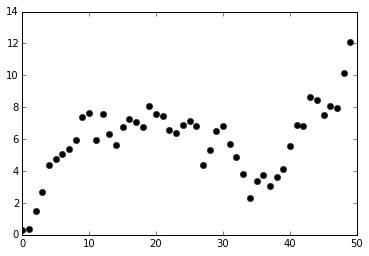

In [16]:
plt.plot(np.random.randn(50).cumsum(), 'ko')

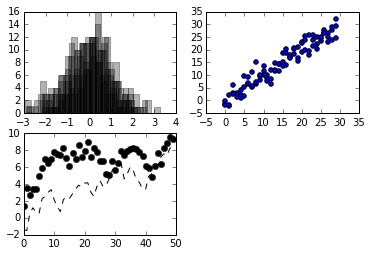

In [22]:
ax1.hist(np.random.randn(100), bins=20, color='k', alpha=0.3)
ax2.scatter(np.arange(30), np.arange(30)+3 * np.random.randn(30))
ax3.plot(np.random.randn(50).cumsum(), 'k--')
fig

## 색상, 마커, 선 스타일

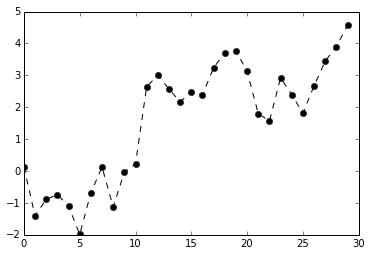

In [23]:
from numpy.random import randn

plt.plot(randn(30).cumsum(), 'ko--')

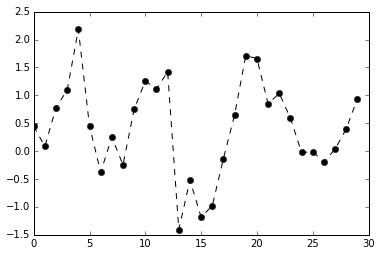

In [24]:
plt.plot(randn(30).cumsum(), color='k', linestyle='dashed', marker='o')

In [25]:
data = randn(30).cumsum()

IPython Notebook에서 plt.figure()가 마지막 객체 참조를 하지 못하기 때문에 명시적으로 마지막 그래프의 객체 참조를 얻어온다.

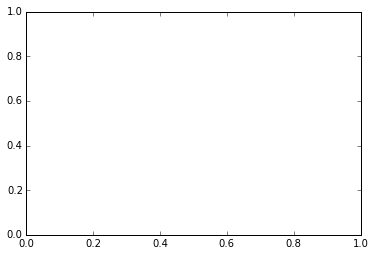

In [53]:
fig = plt.figure()
ax = fig.add_subplot(1,1,1)

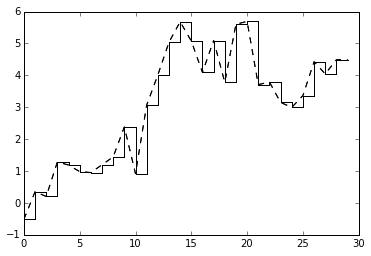

In [55]:
ax.plot(data, 'k--', label='Default')
ax.plot(data, 'k-', drawstyle='steps-post', label='steps-post')
fig

## 눈금, 라벨, 범례

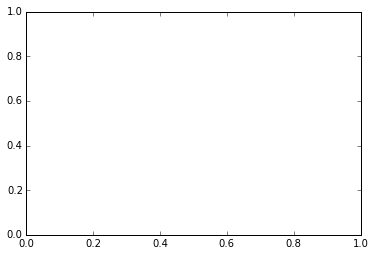

In [68]:
fig = plt.figure()
ax = fig.add_subplot(1,1,1)

같은 그래프 객체를 활용하면, 그래프가 계속 덧씌워진다.

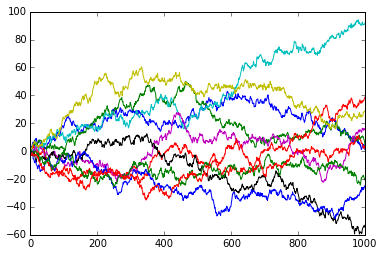

In [69]:
for i in range(10):
    ax.plot(randn(1000).cumsum())
fig

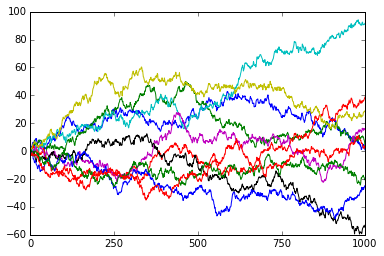

In [72]:
ticks = ax.set_xticks([0,250, 500, 750, 1000])
fig

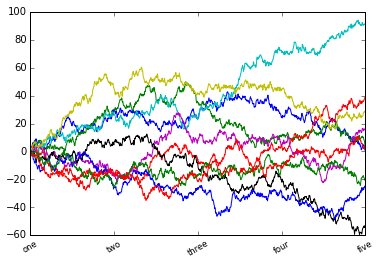

In [74]:
labels = ax.set_xticklabels(['one', 'two', 'three', 'four', 'five'],
                          rotation=30, fontsize='small')
fig

#### 한글 표시 관련

1. 기본 글씨체(font)가 한글을 잘 처리하지 못할 수 있다.
2. 반드시 유니코드 문자열을 지정해야 한다. 

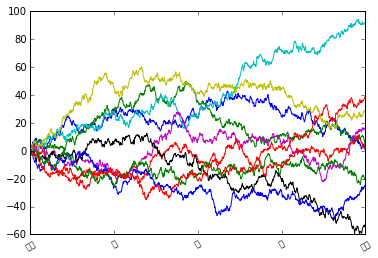

In [77]:
labels = ax.set_xticklabels([u'하나', u'둘', u'셋', u'넷', u'다섯'],
                          rotation=30, fontsize='small')
fig

### 범례 추가

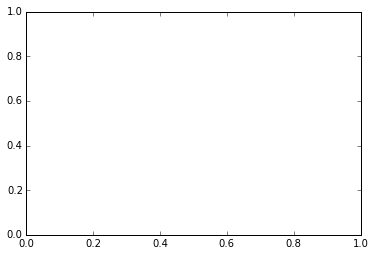

In [87]:
fig = plt.figure()
ax = fig.add_subplot(1,1,1)

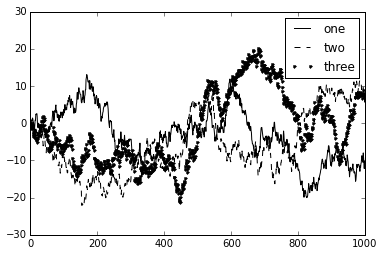

In [88]:
ax.plot(randn(1000).cumsum(), 'k', label='one')
ax.plot(randn(1000).cumsum(), 'k--', label='two')
ax.plot(randn(1000).cumsum(), 'k.', label='three')
ax.legend(loc='best')

fig

pydata/ch08/spx.csv 데이터를 읽어들여 그래프로 표시하기

(600, 1800)

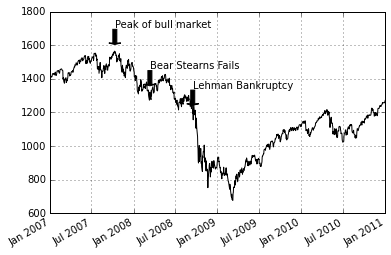

In [95]:
from datetime import datetime
import pandas as pd

# 새 그래프 객체 생성
fig = plt.figure()
ax = fig.add_subplot(1,1,1)

# 대상 데이터를 읽어들여 pandas.DataFrame으로 생성
data = pd.read_csv('pydata/ch08/spx.csv', 
                   index_col=0,
                  parse_dates=True)
spx = data['SPX']

# 그래프 출력
spx.plot(ax=ax, style='k-')

crisis_data = [(datetime(2007,10,11), 'Peak of bull market'),
               (datetime(2008, 3, 12), 'Bear Stearns Fails'), 
               (datetime(2008, 9, 15), 'Lehman Bankruptcy')]

for date, label in crisis_data:
    ax.annotate(label, 
                xy=(date, spx.asof(date)+50),
               xytext=(date, spx.asof(date)+200),
               arrowprops=dict(facecolor='black'),
               horizontalalignment='left',
               verticalalignment='top')
    
ax.set_xlim(['2007-01-01', '2011-01-01'])
ax.set_ylim([600, 1800])

이미지 파일로 저장하기

In [98]:
fig.savefig('financial_crisis.pdf')

# pandas 그래프

In [101]:
from pandas import Series, DataFrame
import pandas as pd

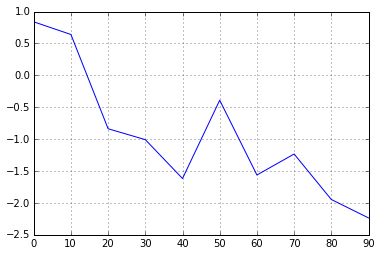

In [10]:
s = Series(np.random.randn(10).cumsum(),
          index=np.arange(0,100,10))
s.plot()

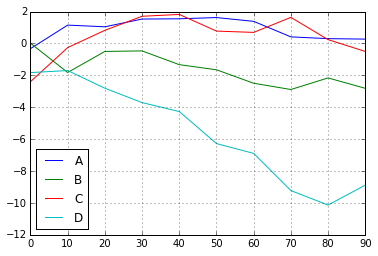

In [102]:
df = DataFrame(np.random.randn(10,4).cumsum(0),
              columns=['A', 'B', 'C', 'D'],
              index=np.arange(0,100, 10))
df.plot()

각 열을 각각의 그래프로 출력할 수도 있다.

array([<matplotlib.axes._subplots.AxesSubplot object at 0x10fdcd150>,
       <matplotlib.axes._subplots.AxesSubplot object at 0x10fad1cd0>], dtype=object)

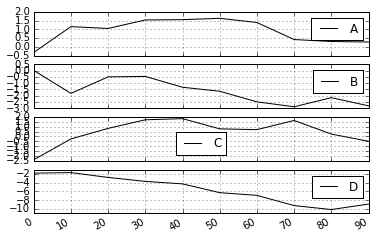

In [103]:
df.plot(subplots=True)

## 막대 그래프

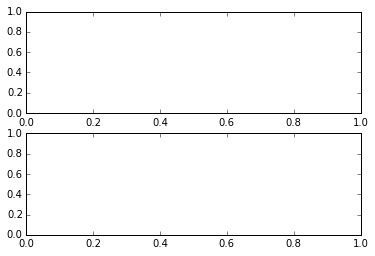

In [113]:
fig, axes = plt.subplots(2,1)

In [114]:
import string
data = Series(np.random.rand(16), 
              index=list(string.ascii_lowercase[:-10]))
data.plot(kind='bar', ax=axes[0], color='k', alpha=0.7)
data.plot(kind='barh', ax=axes[1], color='k', alpha=0.7)

Series 또는 DataFrame에 특정 그래프 객체를 지정하는 경우, 명시적으로 해당 객체를 불러줘야 출력이 발생한다.

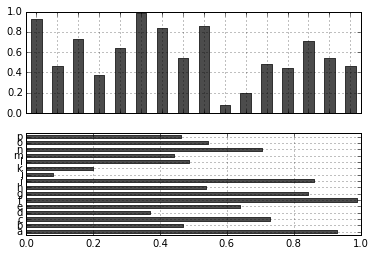

In [115]:
fig

In [118]:
df = DataFrame(randn(6,4),
              index=['one', 'two', 'three', 'four', 'five', 'six'],
              columns=['A', 'B', 'C', 'D'])
df

,A,B,C,D
one,-0.890534,0.407388,-0.765512,-1.283226
two,-0.424958,-1.021486,-1.451917,0.036040
three,0.919788,0.381439,-0.625323,-0.165905
four,-0.838285,-0.224465,1.578564,0.941672
five,-0.283703,0.101071,1.226585,-0.571653
six,0.704813,0.670756,-2.144446,0.186076


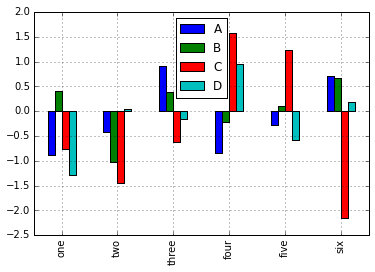

In [120]:
df.plot(kind='bar')

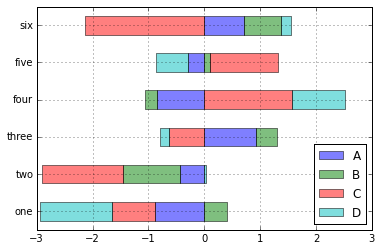

In [121]:
df.plot(kind='barh', stacked=True, alpha=0.5)

팁을 많이 받으려면 어떻게 해야할까?

In [123]:
tips = pd.read_csv('pydata/ch08/tips.csv')
tips

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4
5,25.29,4.71,Male,No,Sun,Dinner,4
6,8.77,2.00,Male,No,Sun,Dinner,2
7,26.88,3.12,Male,No,Sun,Dinner,4
8,15.04,1.96,Male,No,Sun,Dinner,2
9,14.78,3.23,Male,No,Sun,Dinner,2


In [127]:
party_counts = pd.crosstab(tips.day, tips['size'])
party_counts

size,1,2,3,4,5,6
day,,,,,,
Fri,1,16,1,1,0,0
Sat,2,53,18,13,1,0
Sun,0,39,15,18,3,1
Thur,1,48,4,5,1,3


In [128]:
party_counts = party_counts.ix[:, 2:5]
party_counts

size,2,3,4,5
day,,,,
Fri,16,1,1,0
Sat,53,18,13,1
Sun,39,15,18,3
Thur,48,4,5,1


요일별 모임 크기의 비율 산출

In [130]:
party_pcts = party_counts.div(
    party_counts.sum(1).astype(float), axis=0)
party_pcts

size,2,3,4,5
day,,,,
Fri,0.888889,0.055556,0.055556,0.000000
Sat,0.623529,0.211765,0.152941,0.011765
Sun,0.520000,0.200000,0.240000,0.040000
Thur,0.827586,0.068966,0.086207,0.017241


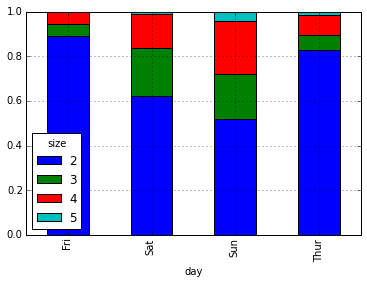

In [131]:
party_pcts.plot(kind='bar', stacked=True)

## 히스토그램과 밀도 그래프

In [133]:
# 전체 결제금액 대비 팁의 비율
tips['tip_pic'] = tips['tip']/tips['total_bill']
tips

,total_bill,tip,sex,smoker,day,time,size,tip_pic
0,16.99,1.01,Female,No,Sun,Dinner,2,0.059447
1,10.34,1.66,Male,No,Sun,Dinner,3,0.160542
2,21.01,3.50,Male,No,Sun,Dinner,3,0.166587
3,23.68,3.31,Male,No,Sun,Dinner,2,0.139780
4,24.59,3.61,Female,No,Sun,Dinner,4,0.146808
5,25.29,4.71,Male,No,Sun,Dinner,4,0.186240
6,8.77,2.00,Male,No,Sun,Dinner,2,0.228050
7,26.88,3.12,Male,No,Sun,Dinner,4,0.116071
8,15.04,1.96,Male,No,Sun,Dinner,2,0.130319
9,14.78,3.23,Male,No,Sun,Dinner,2,0.218539


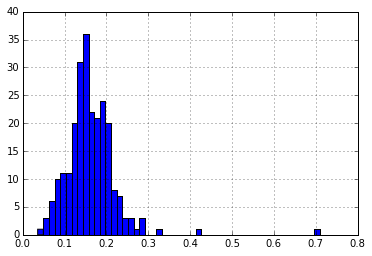

In [46]:
tips['tip_pic'].hist(bins=50)

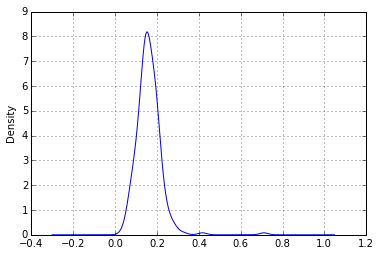

In [48]:
tips['tip_pic'].plot(kind='kde')

In [134]:
comp1 = np.random.normal(0,1, size=200)
comp2 = np.random.normal(10,2, size=200)

In [136]:
values = Series(np.concatenate([comp1,comp2]))
values

0      -0.392141
1      -2.022129
2       0.383240
3       1.189365
4       0.789924
5       0.801392
6       0.152459
7       1.026222
8      -0.436435
9       0.785367
10      2.373741
11      0.610766
12      0.121957
13      0.495155
14     -0.755892
15     -1.511141
16      0.155764
17     -2.226933
18     -0.866165
19     -0.182007
20     -0.414689
21     -1.216097
22      0.029847
23     -1.576074
24      0.607915
25      0.909457
26      0.997695
27     -0.388844
28      1.111692
29      0.685853
         ...    
370    13.620329
371     6.351468
372    12.522897
373     8.954957
374     6.776597
375    12.471993
376    11.895363
377     6.420361
378    10.465821
379     7.242765
380     8.178385
381     8.514143
382    12.186134
383    10.924256
384    12.314108
385     7.030186
386    10.316331
387     9.739268
388     9.114250
389     9.443774
390    10.599404
391     8.303145
392    12.987847
393     8.589991
394     8.401541
395    13.827784
396     7.336283
397     9.6008

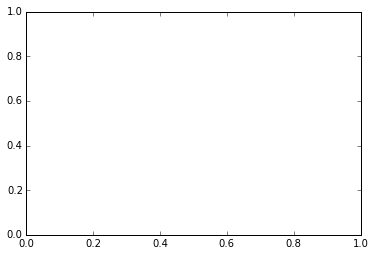

In [150]:
fig = plt.figure()
ax = fig.add_subplot(1,1,1)

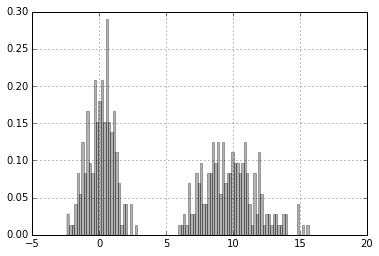

In [152]:
values.hist(bins=100, alpha=0.3, color='k', normed=True)

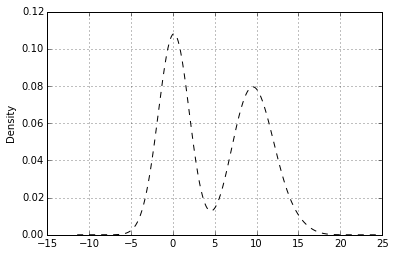

In [141]:
values.plot(kind='kde', style='k--')

## 산포도 (scatter-ness)

분산된 정도를 시각화

In [153]:
macro = pd.read_csv('pydata/ch08/macrodata.csv')
macro

,year,quarter,realgdp,realcons,realinv,realgovt,realdpi,cpi,m1,tbilrate,unemp,pop,infl,realint
0,1959,1,2710.349,1707.4,286.898,470.045,1886.9,28.980,139.7,2.82,5.8,177.146,0.00,0.00
1,1959,2,2778.801,1733.7,310.859,481.301,1919.7,29.150,141.7,3.08,5.1,177.830,2.34,0.74
2,1959,3,2775.488,1751.8,289.226,491.260,1916.4,29.350,140.5,3.82,5.3,178.657,2.74,1.09
3,1959,4,2785.204,1753.7,299.356,484.052,1931.3,29.370,140.0,4.33,5.6,179.386,0.27,4.06
4,1960,1,2847.699,1770.5,331.722,462.199,1955.5,29.540,139.6,3.50,5.2,180.007,2.31,1.19
5,1960,2,2834.390,1792.9,298.152,460.400,1966.1,29.550,140.2,2.68,5.2,180.671,0.14,2.55
6,1960,3,2839.022,1785.8,296.375,474.676,1967.8,29.750,140.9,2.36,5.6,181.528,2.70,-0.34
7,1960,4,2802.616,1788.2,259.764,476.434,1966.6,29.840,141.1,2.29,6.3,182.287,1.21,1.08
8,1961,1,2819.264,1787.7,266.405,475.854,1984.5,29.810,142.1,2.37,6.8,182.992,-0.40,2.77
9,1961,2,2872.005,1814.3,286.246,480.328,2014.4,29.920,142.9,2.29,7.0,183.691,1.47,0.81


In [156]:
# 특정 열 선택
data = macro[['cpi', 'm1', 'tbilrate', 'unemp']]
data[:3]

,cpi,m1,tbilrate,unemp
0,28.98,139.7,2.82,5.8
1,29.15,141.7,3.08,5.1
2,29.35,140.5,3.82,5.3


In [161]:
trans_data = np.log(data).diff().dropna()
trans_data[-5:]

,cpi,m1,tbilrate,unemp
198,-0.007904,0.045361,-0.396881,0.105361
199,-0.021979,0.066753,-2.277267,0.139762
200,0.002340,0.010286,0.606136,0.160343
201,0.008419,0.037461,-0.200671,0.127339
202,0.008894,0.012202,-0.405465,0.042560


산포드 그래프 출력

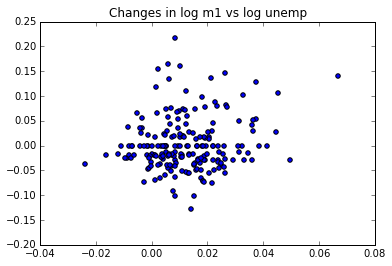

In [163]:
plt.scatter(trans_data['m1'], trans_data['unemp'])
plt.title('Changes in log {} vs log {}'.format('m1', 'unemp'))

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x115a66990>,
        <matplotlib.axes._subplots.AxesSubplot object at 0x116623710>]], dtype=object)

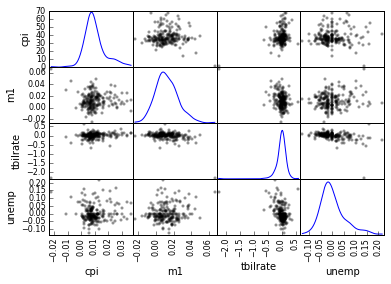

In [164]:
pd.scatter_matrix(trans_data, diagonal='kde', color='k', alpha=0.3)

## 아이티 지진 데이터 시각화

In [165]:
data = pd.read_csv('pydata/ch08/Haiti.csv')
data

,Serial,INCIDENT TITLE,INCIDENT DATE,LOCATION,DESCRIPTION,CATEGORY,LATITUDE,LONGITUDE,APPROVED,VERIFIED
0,4052,* URGENT * Type O blood donations needed in #J...,05/07/2010 17:26,"Jacmel, Haiti",Birthing Clinic in Jacmel #Haiti urgently need...,"1. Urgences | Emergency, 3. Public Health,",18.233333,-72.533333,YES,NO
1,4051,"Food-Aid sent to Fondwa, Haiti",28/06/2010 23:06,fondwa,Please help food-aid.org deliver more food to ...,"1. Urgences | Emergency, 2. Urgences logistiqu...",50.226029,5.729886,NO,NO
2,4050,how haiti is right now and how it was during t...,24/06/2010 16:21,centrie,i feel so bad for you i know i am supposed to ...,"2. Urgences logistiques | Vital Lines, 8. Autr...",22.278381,114.174287,NO,NO
3,4049,Lost person,20/06/2010 21:59,Genoca,We are family members of Juan Antonio Zuniga O...,"1. Urgences | Emergency,",44.407062,8.933989,NO,NO
4,4042,Citi Soleil school,18/05/2010 16:26,"Citi Soleil, Haiti",We are working with Haitian (NGO) -The Christi...,"1. Urgences | Emergency,",18.571084,-72.334671,YES,NO
5,4041,Radio Commerce in Sarthe,26/04/2010 13:14,"Radio Commerce Shelter, Sarthe",i'm Louinel from Sarthe. I'd to know what can ...,"5e. Communication lines down,",18.593707,-72.310079,YES,NO
6,4040,Contaminated water in Baraderes.,26/04/2010 14:19,Marc near Baraderes,How do we treat water in areas without Pipe?\t...,"4. Menaces | Security Threats, 4e. Assainissem...",18.482800,-73.638800,YES,NO
7,4039,Violence at &quot;arcahaie bas Saint-Ard&quot;,26/04/2010 14:27,unable to find &quot;arcahaie bas Saint-Ard&qu...,Goodnight at (arcahaie bas Saint-Ard) 2 young ...,"4. Menaces | Security Threats,",18.415000,-73.195000,YES,NO
8,4038,No electricity in pernier,15/03/2010 10:58,Pernier,why the people who lives in pernier doesn't fi...,"2. Urgences logistiques | Vital Lines, 2f. San...",18.517443,-72.236841,YES,NO
9,4037,Shelter and food needed at Lamentin 54 and Rue...,15/03/2010 11:00,Intersection of Lamentin 54 and Rue St Juste,"GOOD EVENING ONG, I'M VERY HAPPY FOR THE AID Y...","2. Urgences logistiques | Vital Lines, 2d. Ref...",18.547790,-72.410010,YES,NO


In [168]:
data[['INCIDENT DATE', 'LATITUDE', 'LONGITUDE']][:10]

,INCIDENT DATE,LATITUDE,LONGITUDE
0,05/07/2010 17:26,18.233333,-72.533333
1,28/06/2010 23:06,50.226029,5.729886
2,24/06/2010 16:21,22.278381,114.174287
3,20/06/2010 21:59,44.407062,8.933989
4,18/05/2010 16:26,18.571084,-72.334671
5,26/04/2010 13:14,18.593707,-72.310079
6,26/04/2010 14:19,18.482800,-73.638800
7,26/04/2010 14:27,18.415000,-73.195000
8,15/03/2010 10:58,18.517443,-72.236841
9,15/03/2010 11:00,18.547790,-72.410010


In [169]:
data['CATEGORY'][:6]

0          1. Urgences | Emergency, 3. Public Health, 
1    1. Urgences | Emergency, 2. Urgences logistiqu...
2    2. Urgences logistiques | Vital Lines, 8. Autr...
3                            1. Urgences | Emergency, 
4                            1. Urgences | Emergency, 
5                       5e. Communication lines down, 
Name: CATEGORY, dtype: object

In [170]:
data.describe()

,Serial,LATITUDE,LONGITUDE
count,3593.000000,3593.000000,3593.000000
mean,2080.277484,18.611495,-72.322680
std,1171.100360,0.738572,3.650776
min,4.000000,18.041313,-74.452757
25%,1074.000000,18.524070,-72.417500
50%,2163.000000,18.539269,-72.335000
75%,3088.000000,18.561820,-72.293570
max,4052.000000,50.226029,114.174287


잘못된 위치 정보와 누락 카테고리 제거

In [173]:
18 < data.LATITUDE < 20

ValueError: The truth value of a Series is ambiguous. Use a.empty, a.bool(), a.item(), a.any() or a.all().

In [178]:
data = data[(data.LATITUDE > 18) & (data.LATITUDE < 20) &
             (data.LONGITUDE > -75) & (data.LONGITUDE < -70) &
                data.CATEGORY.notnull()]
data

,Serial,INCIDENT TITLE,INCIDENT DATE,LOCATION,DESCRIPTION,CATEGORY,LATITUDE,LONGITUDE,APPROVED,VERIFIED
0,4052,* URGENT * Type O blood donations needed in #J...,05/07/2010 17:26,"Jacmel, Haiti",Birthing Clinic in Jacmel #Haiti urgently need...,"1. Urgences | Emergency, 3. Public Health,",18.233333,-72.533333,YES,NO
4,4042,Citi Soleil school,18/05/2010 16:26,"Citi Soleil, Haiti",We are working with Haitian (NGO) -The Christi...,"1. Urgences | Emergency,",18.571084,-72.334671,YES,NO
5,4041,Radio Commerce in Sarthe,26/04/2010 13:14,"Radio Commerce Shelter, Sarthe",i'm Louinel from Sarthe. I'd to know what can ...,"5e. Communication lines down,",18.593707,-72.310079,YES,NO
6,4040,Contaminated water in Baraderes.,26/04/2010 14:19,Marc near Baraderes,How do we treat water in areas without Pipe?\t...,"4. Menaces | Security Threats, 4e. Assainissem...",18.482800,-73.638800,YES,NO
7,4039,Violence at &quot;arcahaie bas Saint-Ard&quot;,26/04/2010 14:27,unable to find &quot;arcahaie bas Saint-Ard&qu...,Goodnight at (arcahaie bas Saint-Ard) 2 young ...,"4. Menaces | Security Threats,",18.415000,-73.195000,YES,NO
8,4038,No electricity in pernier,15/03/2010 10:58,Pernier,why the people who lives in pernier doesn't fi...,"2. Urgences logistiques | Vital Lines, 2f. San...",18.517443,-72.236841,YES,NO
9,4037,Shelter and food needed at Lamentin 54 and Rue...,15/03/2010 11:00,Intersection of Lamentin 54 and Rue St Juste,"GOOD EVENING ONG, I'M VERY HAPPY FOR THE AID Y...","2. Urgences logistiques | Vital Lines, 2d. Ref...",18.547790,-72.410010,YES,NO
10,4036,"Food needed, House collapsed in 1ere Section S...",15/03/2010 14:18,Assumed 1ere Section Salagnac and Salagnac de ...,"i'm living in Nip Department, First section sa...","1a. Highly vulnerable, 2. Urgences logistiques...",18.415000,-73.195000,YES,NO
11,4035,Clogged toilet in canape vert,19/03/2010 10:19,Canape Vert,Please give the message for with the concern O...,"4. Menaces | Security Threats, 4e. Assainissem...",18.539513,-72.327118,YES,NO
12,4034,Tent shelter and food needed on Lapot St. Carr...,22/03/2010 10:49,"unable to find street, mapped to Carrefour","We need tent, cover, rice. Uneted Nation never...","2. Urgences logistiques | Vital Lines, 2d. Ref...",18.534260,-72.408960,YES,NO


In [183]:
def to_cat_list(catstr):
    """카테고리 항목의 값을 추출해 리스트로 반환"""
    stripped = (x.strip() for x in catstr.split(','))
    return [x for x in stripped if x]

In [184]:
to_cat_list?

In [181]:
data.ix[0,'CATEGORY']

'1. Urgences | Emergency, 3. Public Health, '

In [182]:
to_cat_list(data.ix[0,'CATEGORY'])

['1. Urgences | Emergency', '3. Public Health']

In [190]:
def get_all_categories(cat_series):
    """Series에서 모든 카테고리의 유형을 분류
    
    @Params
    cat_series : 카테고리 정보를 담은 pandas.Series 객체
    
    @returns
    고유한 카테고리 값을 포함하는 리스트
    """
    cat_sets = (set(to_cat_list(x)) for x in cat_series)
    return sorted(set.union(*cat_sets))

In [191]:
get_all_categories?

In [186]:
set([1,2,3,4,4,5,6,7,7,8])

{1, 2, 3, 4, 5, 6, 7, 8}

In [187]:
cat_series = data.CATEGORY
cat_series

0             1. Urgences | Emergency, 3. Public Health, 
4                               1. Urgences | Emergency, 
5                          5e. Communication lines down, 
6       4. Menaces | Security Threats, 4e. Assainissem...
7                         4. Menaces | Security Threats, 
8       2. Urgences logistiques | Vital Lines, 2f. San...
9       2. Urgences logistiques | Vital Lines, 2d. Ref...
10      1a. Highly vulnerable, 2. Urgences logistiques...
11      4. Menaces | Security Threats, 4e. Assainissem...
12      2. Urgences logistiques | Vital Lines, 2d. Ref...
13      2. Urgences logistiques | Vital Lines, 2b. Pen...
14                                     3. Public Health, 
15                2. Urgences logistiques | Vital Lines, 
16      1. Urgences | Emergency, 7. Secours | Services...
17             3. Public Health, 3b. Chronic care needs, 
18      2. Urgences logistiques | Vital Lines, 2b. Pen...
19      1. Urgences | Emergency, 7. Secours | Services...
20      1. Urg

In [200]:
all_cats = get_all_categories(cat_series)
all_cats

['1. Urgences | Emergency',
 '1a. Highly vulnerable',
 '1b. Urgence medicale | Medical Emergency',
 '1c. Personnes prises au piege | People trapped',
 '1d. Incendie | Fire',
 '2. Urgences logistiques | Vital Lines',
 "2a. Penurie d'aliments | Food Shortage",
 "2b. Penurie d'eau | Water shortage",
 '2c. Eau contaminee | Contaminated water',
 '2c. Probleme de securite | Security Concern',
 '2d. Refuge | Shelter needed',
 '2e. Penurie de carburant | Fuel shortage',
 '2f. Sans courant | Power Outage',
 '3. Public Health',
 '3a. Infectious human disease',
 '3b. Chronic care needs',
 '3c. Besoins en materiels et medicaments | Medical equipment and supply needs',
 "3d. OBGYN/Women's Health",
 '3e. Psychiatric need',
 '4. Menaces | Security Threats',
 '4a. Pillage | Looting',
 '4c. Group violence',
 '4e. Assainissement eau et hygiene | Water sanitation and hygiene promotion',
 '5. Infrastructure Damage',
 '5a. Structure effondres | Collapsed structure',
 '5b. Structures a risque | Unstable Str

In [194]:
def get_english(cat):
    code, names = cat.split('.')
    if '|' in names:
        names = names.split('|')[1]
    return code, names.strip()

In [196]:
cat = all_categories[0]
print(cat)
get_english(cat)

1. Urgences | Emergency


('1', 'Emergency')

In [201]:
english_mapping = dict(get_english(x) for x in all_cats)
english_mapping

{'1': 'Emergency',
 '1a': 'Highly vulnerable',
 '1b': 'Medical Emergency',
 '1c': 'People trapped',
 '1d': 'Fire',
 '2': 'Vital Lines',
 '2a': 'Food Shortage',
 '2b': 'Water shortage',
 '2c': 'Security Concern',
 '2d': 'Shelter needed',
 '2e': 'Fuel shortage',
 '2f': 'Power Outage',
 '3': 'Public Health',
 '3a': 'Infectious human disease',
 '3b': 'Chronic care needs',
 '3c': 'Medical equipment and supply needs',
 '3d': "OBGYN/Women's Health",
 '3e': 'Psychiatric need',
 '4': 'Security Threats',
 '4a': 'Looting',
 '4c': 'Group violence',
 '4e': 'Water sanitation and hygiene promotion',
 '5': 'Infrastructure Damage',
 '5a': 'Collapsed structure',
 '5b': 'Unstable Structure',
 '5c': 'Road blocked',
 '5d': 'Compromised bridge',
 '5e': 'Communication lines down',
 '6': 'Natural Hazards',
 '6a': 'Deaths',
 '6b': 'Missing Persons',
 '6c': 'Earthquake and aftershocks',
 '7': 'Services Available',
 '7a': 'Food distribution point',
 '7b': 'Water distribution point',
 '7c': 'Non-food aid distribu

In [202]:
english_mapping['2a']

'Food Shortage'

In [203]:
english_mapping['6c']

'Earthquake and aftershocks'

In [204]:
def get_code(seq):
    return [x.split('.')[0] for x in seq if x]

In [207]:
'hello, world!'.split(',')[0]

'hello'

고유한 코드값 추출해 pandas.Index 객체로 생성

In [208]:
all_codes = get_code(all_cats)
code_index = pd.Index(np.unique(all_codes))
code_index

Index([u'1', u'1a', u'1b', u'1c', u'1d', u'2', u'2a', u'2b', u'2c', u'2d', u'2e', u'2f', u'3', u'3a', u'3b', u'3c', u'3d', u'3e', u'4', u'4a', u'4c', u'4e', u'5', u'5a', u'5b', u'5c', u'5d', u'5e', u'6', u'6a', u'6b', u'6c', u'7', u'7a', u'7b', u'7c', u'7d', u'7g', u'7h', u'8', u'8a', u'8c', u'8d', u'8e', u'8f'], dtype='object')

In [209]:
dummy_frame = DataFrame(np.zeros((len(data), len(code_index))),
                       index=data.index,
                       columns=code_index)
dummy_frame.ix[:, :6]

,1,1a,1b,1c,1d,2
0,0,0,0,0,0,0
4,0,0,0,0,0,0
5,0,0,0,0,0,0
6,0,0,0,0,0,0
7,0,0,0,0,0,0
8,0,0,0,0,0,0
9,0,0,0,0,0,0
10,0,0,0,0,0,0
11,0,0,0,0,0,0
12,0,0,0,0,0,0


In [211]:
zip(['a','b','c'], [3,4,5])

[('a', 3), ('b', 4), ('c', 5)]

In [212]:
zip(data.index, data.CATEGORY)[:3]

[(0, '1. Urgences | Emergency, 3. Public Health, '),
 (4, '1. Urgences | Emergency, '),
 (5, '5e. Communication lines down, ')]

In [213]:
for row, cat in zip(data.index, data.CATEGORY):
    codes = get_code(to_cat_list(cat))
    dummy_frame.ix[row, codes] = 1
    
data = data.join(dummy_frame.add_prefix('category_'))
data.ix[:, 10:15]

,category_1,category_1a,category_1b,category_1c,category_1d
0,1,0,0,0,0
4,1,0,0,0,0
5,0,0,0,0,0
6,0,0,0,0,0
7,0,0,0,0,0
8,0,0,0,0,0
9,0,0,0,0,0
10,0,1,0,0,0
11,0,0,0,0,0
12,0,0,0,0,0


확장 패키지 설치 필요

1. Windows

설치 가능한 바이너리(.exe) 파일로 제공

2. OS X

\$ brew install geos

\$ python basecamp-x.y.z/setup.py install

http://maplotlib.github.com/basemap

In [215]:
from mpl_toolkits.basemap import Basemap

In [229]:
Basemap?

In [216]:
import matplotlib.pyplot as plt

In [226]:
def basic_haiti_map(ax=None, lllat=17.25, urlat=20.25,
                   lllon=75, urlon=71):
    # Basemap 객체 생성
    m = Basemap(ax=ax,
                projection='stere',
                # 중심 좌표값 설정
                lon_0=(urlon+lllon)/2, lat_0=(urlat+lllat)/2,
                # 경계 좌표값 설정
                llcrnrlat=lllat, llcrnrlon=lllon,
                urcrnrlat=urlat, urcrnrlon=urlon,
                # 해상도 설정
                resolution='f')
    # 해안선과 주 경계 그리기
    m.drawcoastlines()
    m.drawstates()
    m.drawcountries()
    return m

각 재해 코드별 지도상 위치를 그래프로 출력

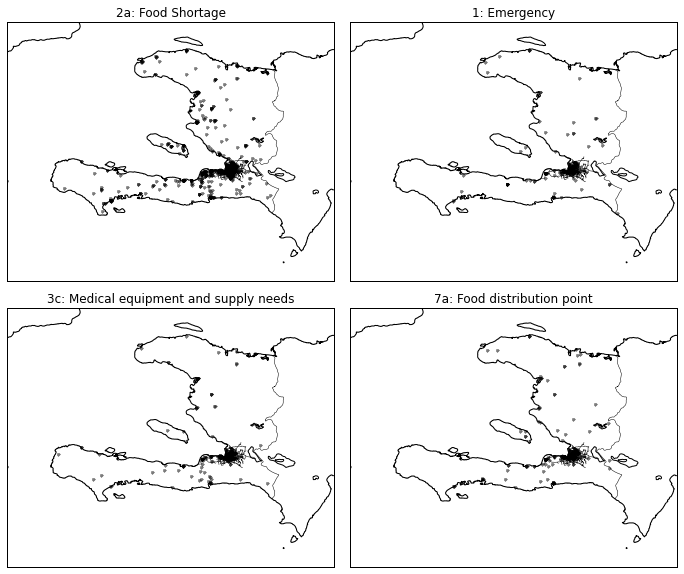

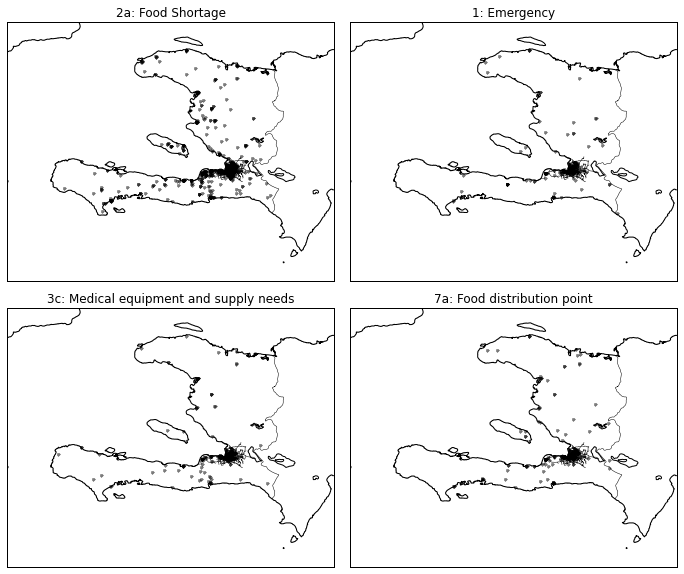

In [235]:
# 그래프 객체 설정
fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(12, 10))
fig.subplots_adjust(hspace=0.05, wspace=0.05)

# 그래프를 그릴 코드값 설정
to_plot=['2a', '1', '3c', '7a']

# 그래프 좌표 설정
lllat, lllon = (17.25, -75)
urlat, urlon = (20.25, -71)

# 도로데이터 파일
shapefile_path = 'pydata/ch08/PortAuPrince_Roads/PortAuPrince_Roads'

for code, ax in zip(to_plot, axes.flat):
    # 각 코드에 대한 그래프 생성
    m = basic_haiti_map(ax, 
                        lllat=lllat, lllon=lllon,
                        urlat=urlat, urlon=urlon)
    
    # 카테코리에 해당하는 데이터 추출
    # category_ 형식은 카테고리 탐지를 위해 미리 생성됨
    cat_data = data[data['category_{}'.format(code)] == 1]
    
    # 도로 오버레이 (겹쳐서 그리기)
    m.readshapefile(shapefile_path, 'roads')
    
    # 각 사건(incident)의 지도의 좌표 설정
    x,y = m(cat_data.LONGITUDE.values, cat_data.LATITUDE.values)
    m.plot(x,y, 'k.', alpha=0.5)
    ax.set_title('{}: {}'.format(code, english_mapping[code]))

# 그래프 출력
fig